# Torch-ONNX-TensorRT Workflow example

This Jupyter notebook serves as a guide to understand how the workflow implemented in the experiments of this work functions.

We define some constants that will be used by our model throughout the workflow:

In [ ]:
# CONSTANTES
BATCH_SIZE = 1
C = 3 # number of channels of the input image
H = 128 # heigh of the input image
W = 32 # width of the input image
NETWORK = 'weights/attunet.pth' # attention U-Nett base model path
import os
current_directory = os.getcwd()

## ONNX: Model Conversion

To convert the model from `.pth` to `.onnx`, we use the code described in `onnx_transform.py` as follows:

In [ ]:
%run onnx_transform.py --weights $NETWORK --input_shape $BATCH_SIZE $C $H $W

This has created the ONNX model, saved in `weights/attunet.onnx`. Now, we need to create the TensorRT Application and optimize the model with it.

## TensorRT Application

To create the TensorRT Application and optimize the model in ONNX format, we use the code in build_trt.py. This code calls `utils/engine.py`, which describes the TensorRT Application. In `utils/engine.py`, you can make further changes to experiment with different types of optimizations.

In [ ]:
ONNX = 'weights/attunet.onnx' # attention U-Nett onnx path

### TRT fp32

In [ ]:
%run build_trt.py --weights $ONNX  --fp32 --input_shape $BATCH_SIZE $C $H $W --engine_name attunet_fp32.engine

### TRT fp16

In [ ]:
%run build_trt.py --weights $ONNX  --fp16 --input_shape $BATCH_SIZE $C $H $W --engine_name attunet_fp16.engine

### TRT int8

In [ ]:
import subprocess
subprocess.Popen('rm -r outputs/cache > /dev/null 2>&1', shell=True)
%run build_trt.py --weights $ONNX  --int8 --input_shape $BATCH_SIZE $C $H $W --engine_name attunet_int8.engine

The optimized models are stored in the `weights` folder.

We validate the models using the validate eval script below:

### Compare Case A

CUDA is available. Using GPU
Comparando modelos base y optimizados
max_mean:  0.21008222500889226 Std:  0.01678764003723858 Min:  0.15758882438575303 Max:  0.2619976347882157
max_mean:  0.9993194471131206 Std:  0.004108368585838874 Min:  0.9437342748506619 Max:  1.0
max_mean:  0.9090224509550338 Std:  0.046457645617760696 Min:  0.7839980229171909 Max:  1.0
(80, 128, 32, 1)
x_test shape:  (80, 3, 128, 32)
x shape:  (1, 3, 128, 32)
Tiempo de ejecución UNet Base: 0.0114 s
Tiempo de ejecución UNet TRT fp32: 0.0030 s
Tiempo de ejecución UNet TRT fp16: 0.0011 s
Tiempo de ejecución UNet TRT int8: 0.0009 s
Tiempo de ejecución Attention UNet Base: 0.0027 s
Tiempo de ejecución Attention UNet TRT FP32: 0.0036 s
Tiempo de ejecución Attention UNet TRT fp16: 0.0015 s
Tiempo de ejecución Attention UNet TRT int8: 0.0012 s


/home/juan/Documents/UNetTRT/eval.py:628: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


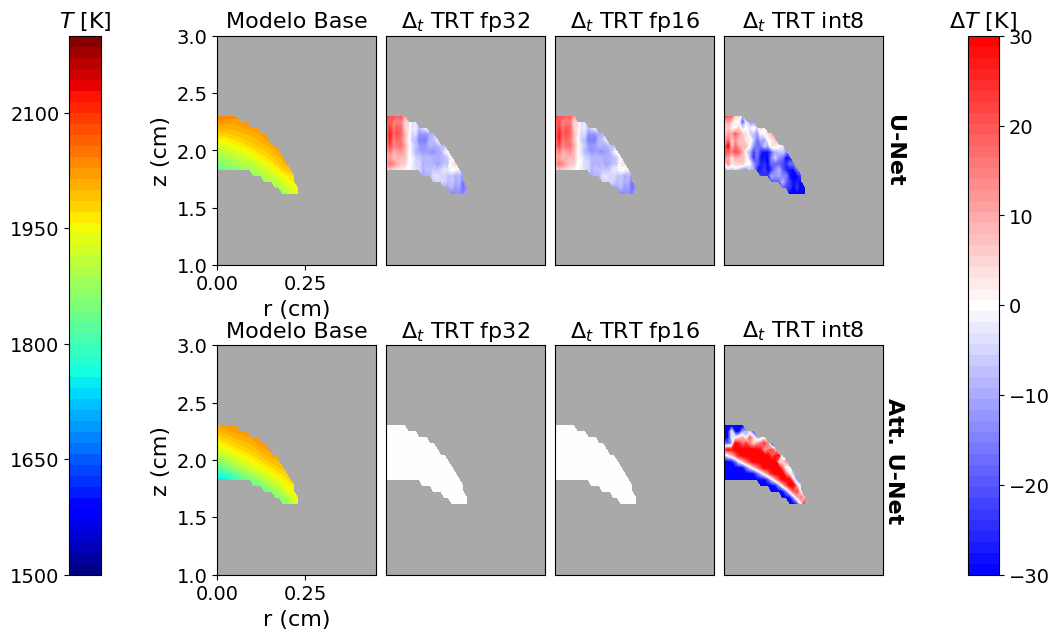

In [6]:
%run eval.py --experiment --compare_all --case A 